<a href="https://colab.research.google.com/github/MatthewFried/Udemy/blob/master/Day2_Notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<br>
<br>
<br>
<br>

# __Module 2: Feature Engineering and Data Preparation__
<br>
<br>
<br>

# Data vs. Information


__Data__ is a collection of individual quantitative and/or qualitative values. Data is raw and unorganized.  It needs to be processed to make it meaningful.

By contrast, __information__ is the result of the __summarization, labeling, and analysis of data__. When data is processed, interpreted, organized, structured or presented so as to make it meaningful or useful, it is called information. Information provides context for data.

To create information, we gather and analyze data.  There may be a fair amount of information already available to us, including:

- The collection method of the data
- How it has been __categorized__, 
- What the __units of analysis__ are
- How it was __calculated__ 
- How it has been __condensed / summarized__

<br>

### **Our task** 
During our EDA work, we are striving to derive __actionable information__ from the data we have at hand by:

- Generating summary statistics
- Generating graphical representations of distributions
- Understanding the relationships between variables
- Imputing missing data values
- Transforming data values via mathematical functions (e.g., scaling, standardization, normalization, etc.)
- Feature Engineering

<br>

### __Why create "Information"__?

Our goal is to derive ACTIONABLE INFORMATION from a set of data. For example, the results of our EDA work are information serve as the basis for our data preparation and model building decisions; without an effective EDA, our data preparation and model building will be ineffective. We use an EDA to __improve the quality__ of our data to extract information in order to make better decisions. 

__Bad Data => Bad Information => Bad Decisions__.



# Feature Engineering


Before creating a model we may want to add new attributes (or "features") to our data that will clarify or simplify our presentation and model. We use **expert domain knowledge** to do this. This is referred to as __feature engineering__.

A __feature__ is a characteristic or property of the independent variables we are planning to use for purposes of analysis or model building. 

<br>

## Some examples of feature engineering:

- __Creation of indicator variables__: If we were working with historical data on US housing prices for the years 2000 - 2018, our domain knowledge could tell us that a major collapse in US housing prices occurred during the 2007 - 2012 timeframe due to the 2007 financial crisis, followed by a recovery that started during the year 2012. As such, if we believe that our overall housing price data content may have been tangibly impacted by the financial crisis, we could create a binary indicator variable that flags every data item within the 2007-2012 time period as potentially having been impacted by the financial crisis (assigning a '1' as the indicator), while all other data items are assigned a '0' for the indicator variable's value.


- __Create "Interaction" Features__: These are new metrics we __derive__ from our existing data.Such as new ratios / proportions from our existing data. We can also do binning / bucketing of numeric data and the de-structuring of date / time values.


- __Combining Sparse Classifications__: With categorical data, "sparse classes" are those that have very few observations. Such "sparse data" can overfit predictive and machine learning models. As such, we can combine sparse classes into new classifications that aggregate the sparse items based on some shared characteristic(s). These "shared characteristics" is highly subjective, i.e., we need to apply our __domain knowledge__ to identify them. 


- __Adding "Dummy" Variables__: We cannot use raw categorical data as input to a model that requires numerical data. Instead, we create a new "0/1" binary indicator variable for each categorical data value. There are several straightforward ways to do this (such as pd.getdummies(df)).  The amount of data we have will grow tremendously with this, but certain techniques require such methods, because categorical data often must be converted this way.


- __Removal of Unused Attributes/Features__: The data may have unneccessary fields for modeling purposes, such as unique ID's ortext descriptions. We must remove this to data to have an effectual model.

<br>

## How to Approach Feature Engineering?

1. Using your __domain knowledge__, brainstorm ideas for potential new features relative to the data you have at hand. If you lack sufficient domain knowledge, seek out subject matter experts and/or develop your own critical mass of knowledge via research + reading.


2. Create the features you believe will be useful (i.e., figure out how to add them to your data set).


3. Test the features within your proposed analysis/model: do they improve the performance of the model? How relevant are they to the data set, i.e., do they provide new information that isn't available in any other attribute/feature already contained in the data set? Are they duplicative/redundant relative to other features/attributes contained within the data set? etc.


4. Refine/improve your new features if needed.


5. Go back to Step 1 (above) and consider whether the addition of other features would be beneficial.

# Data Preparation: How to Correct Data Quality Problems

About 80% of time is consumed by data preparation tasks (e.g., data cleansing, data transformation / reformatting, data rearrangement, etc.). Our EDA should address the following:

- Missing Data
- Duplicate Data
- Adding 'Derived' Data
- Discretization/Binning (Simplification of continuous numerical data for analytical purposes)
- Outliers
- Creating Dummy Variables

## Missing Data

- Check for the reason for the missing data. Perhaps it is unavailable or a mistake.


- Ask what biases might missing values be introducing to the data set in terms of statistics


- Removing data could be beneficial or it could negatively impact the rest of the data, as such, we must assess this.


- Fill the missing values with a valid value derived from the actual valid values of the attribute (e.g., mean, mode, median). This may alter the probability density function (PDF) of the affected attribute. If the PDF changes, what impact does that have on the rest of your otherwise valid data?


- Even better solution: Fill the missing values using an approach that __does not__ change the PDF of the affected attribute. Examples include using a linear model or regression model to calculate an appropriate value based on the valid values that populate the rest of the associated use cases.


## Duplicate Data

- Ask why the data is duplicated. 
- Check if the duplicatoin is valid.
- Evaluate the outcome of removing duplicates

## Discretization & Binning

- Separate data into bins.


- Be careful not to introduce noise when choosing bins that are either too small or too big


- Bins should be equal in size


- Simplistic rule of thumb: __binwidth__ = (max(values) - min(values)) / sqrt(n) where n = number of data values


- Simplistic rule of thumb: __number of bins__ = sqrt(n) where n = number of data values


- In general, use fewer bins for small amounts of data; use more bins for large amounts of data.


## Outliers

- Identify outliers and check for values that fall far outside the range of the standard deviation. Ask what can really be called an oulier and how it effects the data.


- __Use domain knowledge + empirical testing to find the boundary that works best__ to find a cut-off point. For example, if we use 2x the standard deviation as the boundary, we are implicitly stating that we believe 5% of our data values for the selected column will be outliers.

- For zero bound data (i.e., attributes that we know for a fact cannot have a negative value), check for values < 0


Once you've identified your outliers, decide what to do with them: leave them alone? Remove them? Replace with another non-outlier value? You need to decide on the appropriate action based on your __domain knowledge__. Remember: __*outliers are not always invalid*__, but they can have a noticeable effect on your analysis. __There is no single "rule" that applies to how outliers should be dealt with__.

## Creating Dummy Variables

- It is not possible to perform numerical statistical analysis using categorical values: categorical variables are not considered to be "numeric" for statistical purposes, even if they are nominally comprised of digits.


- To enable statistical analysis of a categorical variable, we must convert the values of the variable into a set of "dummy" vectors whose values are either True (the categorical value is present in the use case) or False (the categorical value is not present in the use case). One dummy variable is needed for each nominal categorical attribute value.

## Improving data quality through normalization, standardization, transforms & scaling

The use of numeric explanatory variables within any machine learning algorithm can prove to be problematic for a variety of reasons. For example:

- The numeric explanatory variables within a data set may have vastly different scales / ranges from one another


- Outliers can significantly skew the distribution of a numeric variable


- Numeric data might be more heterogeneous than is necessary for the derivation of a high-performing predictive model


- Some machine learning algorithms achieve better performance results when all numeric explanatory variables have been __standardized__, i.e., each explanatory variable has been numerically transformed to ensure that its mean value is zero.


Many of these problems can be addressed through the use of numeric transforms. 

__Box-Cox Transforms__ ( https://www.statisticshowto.datasciencecentral.com/box-cox-transformation/) is applied to many non-normally distributed numeric variables to transform the data into dispersements that are more Gaussian in nature. The Box-Cox approach seeks to identify an appropriate exponent (Lambda) for this transformation. The Lambda value indicates the power to which all data values for a given variable should be raised. 

Box-Cox generally requires that all data values within the variable be __positive__. If one has negative data, add a fixed constant to every value as a shift.

Some of the most commonly used Box-Cox transforms are listed in the table shown in the link above. Note that the content of the table provides us with a very clear indication of the transformation formula to be used relative to a given exponent value (Lambda). 

In Python, we can implement Box-Cox transforms via the __sklearn.preprocessing.power_transform()__ function (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.power_transform.html). This function will automatically test the full range of potential exponent values to identify the transform that minimizes the standard deviation of the data.

<br> 

### Other types of scaling methods can also be used to address data quality issues

These include normalization, standardization, one-to-many transforms and smoothing splines.

<br>

#### Normalization vs. Standardization: What's the difference?

- __Normalization__: We use normalization when we know that the distribution of our data does not approximate a Gaussian distribution. The below formula transforms all data values to fall within the range of $(0 <= Xnormalized <= 1)$. It is called a "__Min-Max Scaler__". A common normalization formula is: 
> $Y' = (X - min(X)) / (max(X) - min(X))$.   


- __Standardization__: We use standardization when we know that the distributions of our variables are relatively Guassian but adhere to very different scales. The below formula will result in a mean of 0 and standard deviation of 1. The formula for calculating Z scores is: 
> $Y' = (x - mean(X)) / standdev(X)$   

<br>

## Caveats and Thoughts

- Use of these techniques makes our models much less "interpretable".
- None of these techniques guarantee model improvement. 
- Some machine learning algorithms require that all explanatory variables be normalized, so check ahead.

<br> 

__The BOTTOM LINE__: If the application of one of these techniques does not improve the performance of your model relative to its performance when applied to the "native" form of your data, continue using the original format. 

## After altering your data, re-run your EDA

-  Alterations to your original data set may change your EDA outcomes.
- You should re-ru your EDA after each cycle of data preparation work. Compare the results and see if it is indeed better.  
- Ask if the distribution changed (or other properties that are meaningful).
- Ask if any of your preliminary inferences regarding which variables might be more "predictive" of a response variable changed?

<br>

__Note__:
It is up to you as a data science practitioner to determine whether your data is "acceptable" for further downstream use. "Acceptable" is obviously a highly subjective term so you must use your own judgment.


<br>
<br>

### __Case Study: Detecting Outliers in hflights' 'Departure Delay' attribute__

In [ ]:
import pandas as pd
import numpy as np

# import seaborn for graphics
import seaborn as sns

filename = "https://raw.githubusercontent.com/MatthewFried/DAV-5400/master/Project1/hflights.csv"
hf = pd.read_csv(filename)
hf.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted
0,2011,1,1,6,1400.0,1500.0,AA,428,N576AA,60.0,40.0,-10.0,0.0,IAH,DFW,224,7.0,13.0,0,NaN,0
1,2011,1,2,7,1401.0,1501.0,AA,428,N557AA,60.0,45.0,-9.0,1.0,IAH,DFW,224,6.0,9.0,0,NaN,0
2,2011,1,3,1,1352.0,1502.0,AA,428,N541AA,70.0,48.0,-8.0,-8.0,IAH,DFW,224,5.0,17.0,0,NaN,0
3,2011,1,4,2,1403.0,1513.0,AA,428,N403AA,70.0,39.0,3.0,3.0,IAH,DFW,224,9.0,22.0,0,NaN,0
4,2011,1,5,3,1405.0,1507.0,AA,428,N492AA,62.0,44.0,-3.0,5.0,IAH,DFW,224,9.0,9.0,0,NaN,0


In [ ]:
# get summary statistics for the DepDelay variable
hf.DepDelay.describe()

count    19785.000000
mean         8.297700
std         23.934218
min        -18.000000
25%         -3.000000
50%          1.000000
75%         10.000000
max        780.000000
Name: DepDelay, dtype: float64

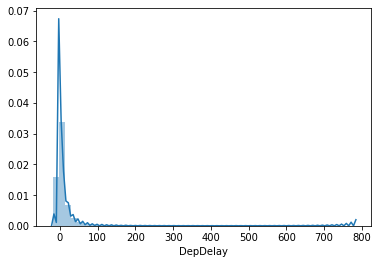

In [ ]:
# create a graphic showing the distribution of the non-null DepDelay
# values
sns.distplot(hf[hf["DepDelay"].notnull()].DepDelay);

Note the severe right skew of the distribution for the DepDelay variable: there seems to be obvious evidence of outlier values, and those outliers are likely to be having a tangible impact on both the distribution AND the summary statistics for the variable (e.g., the mean value).

In [ ]:
# find all hflight rows that have DepDelay values whose values are > 
# 2.5 standard deviations from the mean of data in that column
vals = [2.5,3,4,5]
for k in vals:
  depdel_outliers = hf[np.abs(hf['DepDelay'] - hf['DepDelay'].mean() ) > (k * hf['DepDelay'].std() )]
  print("Info for a standard deviation of " + str(k) + ":")
  print("The shape is: " + str(depdel_outliers.shape))
  print(f"The percentage of outliers is {depdel_outliers.shape[0]/hf.shape[0]:.3%}.")
  print(depdel_outliers.DepDelay.describe())
  print("\n")

Info for a standard deviation of 2.5:
The shape is: (529, 21)
The percentage of outliers is 2.645%.
count    529.000000
mean     114.325142
std       57.401927
min       69.000000
25%       79.000000
50%       97.000000
75%      131.000000
max      780.000000
Name: DepDelay, dtype: float64


Info for a standard deviation of 3:
The shape is: (384, 21)
The percentage of outliers is 1.920%.
count    384.000000
mean     129.619792
std       60.680486
min       81.000000
25%       93.750000
50%      112.500000
75%      146.000000
max      780.000000
Name: DepDelay, dtype: float64


Info for a standard deviation of 4:
The shape is: (232, 21)
The percentage of outliers is 1.160%.
count    232.000000
mean     155.073276
std       66.582623
min      105.000000
25%      117.000000
50%      137.000000
75%      170.250000
max      780.000000
Name: DepDelay, dtype: float64


Info for a standard deviation of 5:
The shape is: (143, 21)
The percentage of outliers is 0.715%.
count    143.000000
mean   

We find that the 143 flights falling more than 5 standard deviations from the
mean DepDeplay value have an average departure delay of more than 3 hours and a median departure delay of 161 minutes.

What happens to the summary statistics for the DepDelay variable if we remove these 143 extreme outliers?

In [ ]:
# create a temporary series for the DepDelay variable
DepDelay_temp = hf.DepDelay
DepDelay_temp.shape

(20000,)

In [ ]:
# now remove the extreme outliers from the temporary series
DD2 = DepDelay_temp.drop(depdel_outliers.index.values)
DD2.shape

(19857,)

In [ ]:
# get summary statistics after the extreme outliers have been removed
DD2.describe()

count    19642.000000
mean         7.046329
std         17.899270
min        -18.000000
25%         -3.000000
50%          1.000000
75%         10.000000
max        127.000000
Name: DepDelay, dtype: float64

Note how the mean decreased from 8.2977 to 7.046 while the standard deviation decreased from 23.934218 to 17.899: these are significant changes, i.e.,  the __mean__ value has __decreased__ by __more than 15%__ while the __standard deviation__ value has __decreased__ by __more than 25%__.

Let's look at how the removal of the extreme outliers effected the distribution of the variable:

Let's make a facet plot showing how these DepDelay outliers are distributed by UniqueCarrier and Origin:

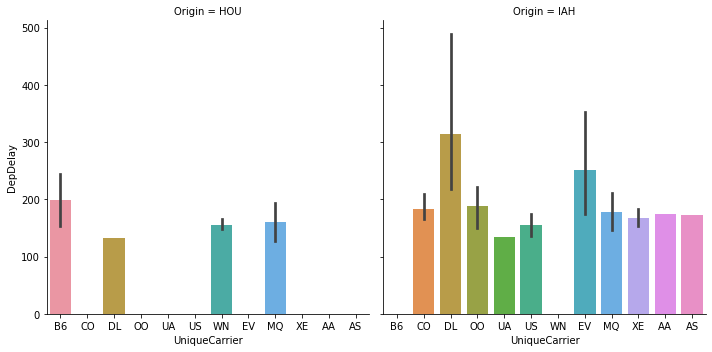

In [ ]:
# facet grid for UniqueCarrier vs. DepDelay outliers by point of origin
# NOTE: the 'factorplot()' function has been renamed to "catplot()"

sns.catplot(x='UniqueCarrier', y='DepDelay', col='Origin',
               kind='bar', data= depdel_outliers);

We see that airlines flying out of IAH appear to experience longer average extreme departure delays than do airlines flying out of HOU. What might be the reason for this? 

We also see that Delta ('DL') seems to experience the highest average severe departure delays of the airlines flying out of IAH. Let's see if we can identify the destinations most impacted by such delays:

In [ ]:
# display a list of extreme departure delays for Delta w origin = IAH
depdel_outliers[(depdel_outliers.UniqueCarrier == 'DL') & (depdel_outliers.Origin == 'IAH')]

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted
6507,2011,1,12,3,1038.0,1340.0,DL,1900,N934DL,122.0,88.0,210.0,218.0,IAH,ATL,689,21.0,13.0,0,NaN,0
6529,2011,1,15,6,941.0,1230.0,DL,1248,N366NB,109.0,86.0,223.0,236.0,IAH,ATL,689,8.0,15.0,0,NaN,0
6532,2011,1,15,6,1737.0,2035.0,DL,1590,N762NC,118.0,94.0,487.0,488.0,IAH,ATL,689,6.0,18.0,0,NaN,0


From the table above we can see there were three extreme departure delays for Delta having an origin of IAH, all of them having a destination of 'ATL', and two of them occurred on the same day 1-15-2001.

Let's create a facet plot showing how these extreme departure delays are distributed by the day of the week for each point of origin:

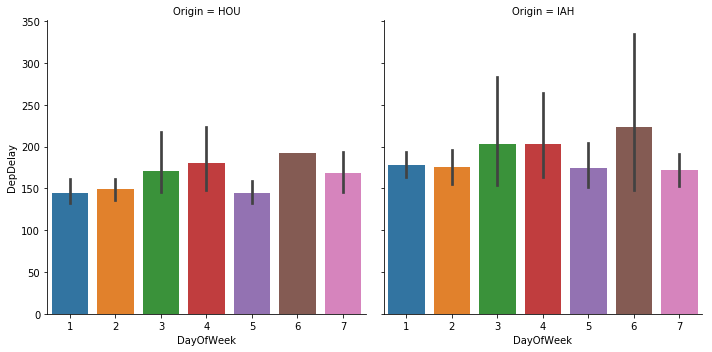

In [ ]:
# facet grid for Dest vs. DepDelay outliers by point of origin
# NOTE: the 'factorplot()' function has been renamed to "catplot()"

sns.catplot(x='DayOfWeek', y='DepDelay', col='Origin',
               kind='bar', data= depdel_outliers);


<br>
<br>

# __Assignment 2__

</br>
</br>

We will be explore and “clean” a data set that suffers from a variety of data integrity + usability issues. The data is comprised of more than 12,700 wines, with many of the attributes being related to the chemical composition of the wines.

![Data](https://drive.google.com/uc?export=view&id=15nrrtFFm__59Nb79fMxjx2FQohS-ngJS)

<br>

### **Assignment Steps**:

1. Load the provided Day2_Data.csv file to your Github Repository. 

2. Use Jupyter or Colab to read the data set from your Github repository and load it into a Pandas dataframe. Summarize the problem and explain how you plan to address it. 

3. Perform an exploratory data analysis (EDA). It should include any insights of the attributes and accompanying exploratory graphics (e.g., bar plots, box plots, histograms, line plots, etc.). It is up to you as the data science practitioner to decide how you go about your EDA, including selecting appropriate statistical metrics to be calculated and which types of exploratory graphics to make use of. You should also identify any and all potential data integrity issues (e.g., missing data values; invalid data values; etc.) and determine whether any data attributes might need to be transformed prior to being used within a machine learning model. Provide an EDA that is thorough and succinct without it being so detailed that a reader will lose interest in it. 

4. Perform appropriate data preparation tasks relative to the data integrity and usability issues identified via EDA work. Describe the ways in which you have transformed / prepared the data for use within a machine learning algorithm, e.g., have you deleted any observations? Used imputation to fill missing data values? Created any new variables? Transformed data via mathematical transforms (e.g., Box-Cox, logarithms, etc.) or binning? etc. Be sure to explain your justification for each adjustment you have made to the data.

5. Re-run your EDA on any variables you have adjusted during Data Preparation and compare / contrast your results to those you saw prior to performing your Data Preparation adjustments. Describe how each of your Data Preparation adjustments have improved the data set for purposes of using it within a machine learning algorithm. 

